In [64]:
import numpy as np
import librosa
import aubio
import matplotlib.pyplot as plt
import librosa.display
import pandas
import os
import glob

In [2]:
def firstOnsetDetect(path,dictionary):
    for subdir, dirs, files in os.walk(path):
        #print(1)
        for filename in files:
            #print(2)
            if filename.endswith(".wav"): 
               # print(3)
                filename = subdir + os.sep + filename
                sig , sr = librosa.load(filename,mono=True,sr=None)
                array = librosa.onset.onset_detect(sig,sr)
                value = array[0]
                dictionary[filename] = value

            if filename.endswith(".m4a"): 
               # print(4)
                filename = subdir + os.sep + filename
                sig , sr = librosa.load(filename,mono=True,sr=None)
                array = librosa.onset.onset_detect(sig,sr)
                value = array[0]
                dictionary[filename] = value

In [127]:
firstOnsets = {}
firstOnsetDetect('/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project', firstOnsets)
#print(firstOnsets)

In [65]:
def extractAttr(filename):
    attr = pandas.read_csv(filename,header=None)
    x = attr.iloc[:,0]
    y = attr.iloc[:,1]  
    x = x[0:130]
    y = y[0:130]
    return y

In [113]:
def readall(attr, numpeople):
    path = '/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/' + attr
    namearray = []
    valuesarray = [[]]
    maximum = 0
    minimum = 1000
    name = None
    x = 0
    # for x in range(numpeople):
    for subdir, dirs, files in os.walk(path):
        if dirs != []:
            namearray.append(dirs)
        for filename in files:
            if filename.endswith(".csv"):    
                filepath = filepath = subdir + os.sep + filename
                values = extractAttr(filepath)
                for i in range(len(values)):
                    valuesarray[x].append(values[i])
                mean = np.mean(values)
                if mean > maximum:
                    maximum = mean
                    maxfile = filepath
                if mean < minimum:
                    minimum = mean                        
                    minfile = filepath
        x=x+1
        valuesarray.append([])
    
    namearray = namearray[0]
    
    plt.figure()
    plt.title(attr)
    plt.boxplot(valuesarray)
    plt.xticks([2,3,4,5,6],[namearray[0],namearray[1],namearray[2],namearray[3],namearray[4]])  
    plt.show()
    return valuesarray, namearray

In [112]:
w  = x[1]
sum(i > 3 for i in w)
np.mean(w)

1.3158910850641026

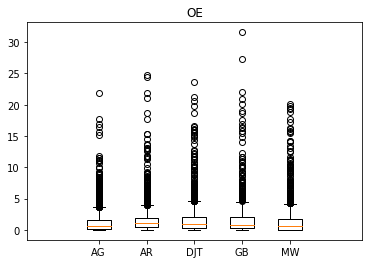

[[], [0.717431, 1.43185, 1.16086, 0.25198400000000004, 2.0540000000000003, 0.636876, 0.259467, 0.7320270000000001, 0.502466, 0.0, 0.0, 0.0, 0.0, 1.7348599999999998, 0.24286100000000002, 0.0, 0.0, 1.23708, 4.44436, 1.29006, 0.269795, 0.824254, 0.0, 0.0, 0.0, 1.3389799999999998, 1.2657200000000002, 0.0, 0.0, 0.22563200000000003, 9.061010000000001, 1.23371, 4.15726, 0.400045, 3.2749900000000003, 0.470408, 0.125606, 0.124866, 0.120324, 0.0, 0.0, 0.0, 0.543914, 0.0, 0.588006, 0.0, 0.0, 0.367179, 0.0, 0.702454, 0.0, 0.125204, 0.22100799999999998, 1.3844, 3.94996, 0.691641, 7.381530000000001, 0.856275, 1.4537, 0.289885, 0.330831, 0.20527800000000002, 0.20386500000000002, 1.38287, 2.1484799999999997, 1.25666, 0.6904279999999999, 0.436125, 1.7628700000000002, 0.0, 0.0, 0.0, 0.317952, 0.0, 1.42622, 0.0, 0.13175599999999998, 2.8206900000000004, 9.18355, 0.0, 0.625562, 0.559232, 0.669411, 0.9235770000000001, 1.74643, 1.9669999999999999, 8.41495, 5.04228, 15.6258, 0.524732, 0.0762826, 11.4529, 3.31

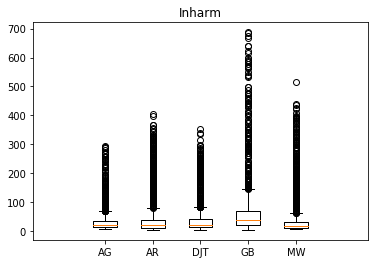

[[], [23.819000000000003, 17.1308, 19.4939, 41.4189, 20.127, 34.2901, 14.3123, 16.5292, 13.2659, 11.9705, 104.292, 73.7497, 10.4722, 17.09, 28.2782, 9.95318, 193.18400000000003, 97.1042, 19.0045, 15.9865, 17.736, 24.5378, 21.7862, 12.0689, 13.1057, 11.6272, 12.8338, 14.6683, 13.9218, 14.7247, 12.8459, 37.5626, 15.6027, 41.445, 16.1466, 18.9367, 16.4262, 17.0484, 18.8276, 17.4116, 15.5756, 293.384, 129.334, 141.29, 30.5862, 249.588, 9.51677, 37.5165, 16.6082, 21.4724, 42.1062, 13.937000000000001, 15.8041, 45.2026, 17.8244, 29.7361, 32.009, 37.3537, 51.0176, 49.0218, 26.3494, 50.1044, 30.5929, 27.4511, 29.2928, 20.8002, 18.1237, 9.51995, 26.7048, 11.7294, 10.4657, 12.5182, 26.6078, 21.7361, 37.2585, 25.8884, 10.7122, 9.22748, 10.286, 40.9225, 55.8673, 42.2253, 47.2097, 42.6363, 38.6028, 18.8444, 16.1071, 15.4323, 76.8302, 127.71700000000001, 17.7596, 13.3067, 21.0421, 35.6824, 43.788000000000004, 43.4888, 35.0793, 52.693999999999996, 29.8755, 32.2105, 20.4765, 35.1898, 41.0405, 33.1649, 

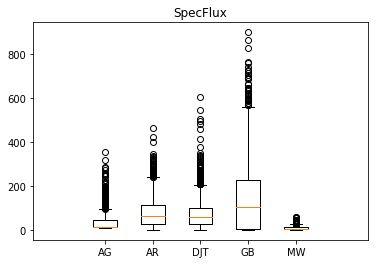

[[], [18.4392, 13.2278, 13.6518, 13.5309, 13.2253, 14.1889, 14.1799, 13.1489, 12.0884, 10.4261, 18.5364, 15.3336, 16.0032, 12.3368, 12.6742, 13.0679, 24.7767, 20.2237, 17.2491, 15.083, 12.9509, 11.133, 14.9995, 13.8295, 13.2457, 12.5148, 11.7073, 11.982000000000001, 12.2368, 12.3293, 13.1554, 13.7223, 13.3934, 14.3464, 15.9849, 11.9404, 11.9049, 10.2451, 9.06963, 8.64228, 10.0444, 23.6034, 19.0594, 18.3052, 18.1764, 20.3309, 17.2207, 17.8779, 13.6051, 12.2173, 15.4434, 15.0838, 12.1108, 14.4351, 15.4532, 12.6643, 12.5638, 14.1643, 14.9996, 16.0062, 14.0652, 15.5195, 15.449000000000002, 14.728, 15.9708, 14.4262, 14.7586, 12.8973, 14.5157, 14.469000000000001, 13.0125, 11.599, 11.4359, 11.2575, 15.3549, 13.4296, 99.3934, 94.323, 101.307, 49.2176, 69.1055, 167.21, 144.582, 157.964, 191.734, 169.605, 112.06299999999999, 103.62100000000001, 49.157, 73.7004, 61.3914, 67.3394, 65.051, 49.9481, 44.9908, 187.627, 181.555, 225.801, 245.792, 169.88, 122.194, 68.4738, 38.0937, 32.236, 80.1691, 55.1

In [114]:
x, namesx = readall('OE',5)
y, namesy = readall('Inharm',5)
z, namesz = readall('SpecFlux',5)
#z = compress(y, 5 , 12)
#print(z)
#print(y) readall('Inharm')
#print(len(y[0]))




In [23]:
print(len(y[0]))
print(len(y[1]))
print(len(y[2]))
print(len(y[3]))
print(len(y[4]))

0
1482
1560
1479
1444


In [68]:
print(namesx)
# How to Trim to Just Name?

['AaronRourk', 'AlexGoldfarb', 'DJT', 'GrantBouvier', 'MW']


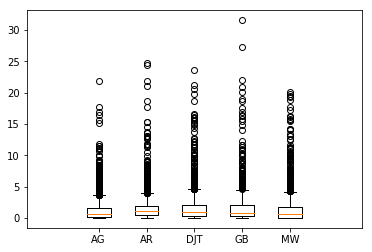

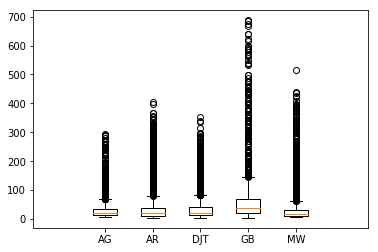

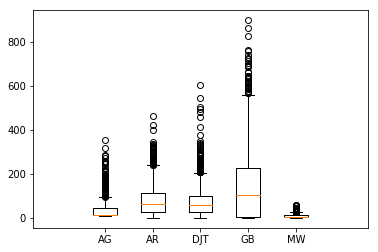

In [73]:
plt.figure()
plt.boxplot(x)
plt.xticks([2,3,4,5,6],[namesx[0],namesx[1],namesx[2],namesx[3],namesx[4]])  
#for i in range(len(namesx)):
 #   plt.xticks([i+2],[namesx[i]])  
plt.show()
 
plt.figure()
plt.boxplot(y)
plt.xticks([2,3,4,5,6],[namesy[0],namesy[1],namesy[2],namesy[3],namesy[4]]) 
plt.show()
plt.figure()
plt.boxplot(z)
plt.xticks([2,3,4,5,6],[namesz[0],namesz[1],namesz[2],namesz[3],namesz[4]]) 
plt.show()

In [26]:
def compress(array,numpeople,numfiles):
    newarray = [[]]*numpeople
    for x in range(numpeople):
        for i in range(numfiles):
            for j in range(int(len(array[i+(x*numfiles)]))):
                print(x)
                newarray[x].append(array[i+(x*numfiles)][j])
                
                
    return newarray
            

In [ ]:
extractAttr('/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/Inharm/GrantBouvier/Clip 1_vamp_vamp-libxtract_spectral_inharmonicity_spectral_inharmonicity.csv')

In [45]:
#plotMeans('Inharm')

In [46]:
#plotMeans('OE')

In [47]:
#plotMeans('SpecFlux')

In [ ]:
def compress(array):
    numsamples = 5 
    newarray = [[]]*numsamples
    print(len(newarray))
    
    for x in range(numsamples):
        print(x)
        len1 = 1
        for i in range(int(len(array)/numsamples)):
            len2 = 1
            for j in range(int(len(array[i])/numsamples)):
                newarray[x].append(array[x][j])
                #z = z+1 
                #print(z)
                #if z == 5:
                    #z = 0
           
    return newarray
            

In [ ]:
def plotMeans(name):
    path = '/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/All/' + name
    #path = os.getcwd()
    means, sds, namearray, maximum, maxfile, minimum, minfile,meanofmeans = readall(path)
    plt.figure()
    #plt.subplot(2,1,1)
    plt.plot(means[1], '*r', label=namearray[1])
    plt.plot(means[2], '*g',label=namearray[2])
    plt.plot(means[3], '*b',label=namearray[3])
    plt.plot(means[4], '*k',label=namearray[4])
    plt.plot(means[5], '*y',label=namearray[5])
    plt.title(name)
    plt.legend(loc="best")
    plt.legend("AADGM")
    
    plt.tight_layout()
    plt.savefig(name + '.png')
    #plt.subplot(2,1,2)
    plt.figure()
    plt.title("Mean of Means" +" " + name)
    plt.plot(meanofmeans[1], '*r', label=namearray[1])
    plt.plot(meanofmeans[2], '*g',label=namearray[2])
    plt.plot(meanofmeans[3], '*b',label=namearray[3])
    plt.plot(meanofmeans[4], '*k',label=namearray[4])
    plt.plot(meanofmeans[5], '*y',label=namearray[5])
    plt.legend(loc="best")
    plt.legend("AADGM")
    
    plt.savefig("Mean of Means" + name + '.png')
    plt.tight_layout()
    
    plotValues(maxfile)
    plotValues(minfile)
    
    
    print("/")
    print(maximum, maxfile)
    print("/")
    print(minimum, minfile)
    